> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday, September 27, 2017*<br>
**Peergrading deadline**: *Wednesday, October 4th, 2017*

## Problems

>**Ex. 2.3.4**: You may have noticed that the data['data'] object has a key called 'after'.
1. What do you think this is?
2. Write a function that takes an integer `N` and the name of a subreddit, and returns a JSON with all posts on the first `N` pages of that subreddit. Use it to retrieve a large number of posts.
3. Make an updated version of the figures you produced in Ex. 2.3.2-3 with this larger dataset.
4. Visualize the number of posts over time.

In [28]:
# 1.
# The key 'after' is a paramter that can be passed into the url as apointer to the next page which 

# 2.
import requests as rq
import json

def subreddit(num_pages, name):
    url = "https://www.reddit.com/r/{0}/.json".format(name)
    data = rq.get(url).json()
    
    posts = []
    
    for i in range(num_pages):
        #print data.keys()
        for post in data['data']['children']:            
            posts.append(post)
        after = data['data']['after']
        url = "https://www.reddit.com/r/{0}/.json?after={1}".format(name, after)
        data = rq.get(url).json()
        
    return posts
    
reddit_posts = subreddit(3, "news")
print reddit_posts

[{u'kind': u't3', u'data': {u'domain': u'independent.co.uk', u'approved_at_utc': None, u'banned_by': None, u'media_embed': {}, u'subreddit': u'news', u'selftext_html': None, u'selftext': u'', u'link_flair_text': None, u'likes': None, u'suggested_sort': None, u'user_reports': [], u'secure_media': None, u'saved': False, u'id': u'724xxs', u'banned_at_utc': None, u'view_count': None, u'archived': False, u'clicked': False, u'report_reasons': None, u'title': u"'Human computer\u2019 Katherine Johnson opens Nasa research facility named in her honour", u'num_crossposts': 1, u'media': None, u'can_mod_post': False, u'is_crosspostable': False, u'pinned': False, u'score': 8146, u'approved_by': None, u'over_18': False, u'hidden': False, u'num_comments': 209, u'thumbnail': u'', u'subreddit_id': u't5_2qh3l', u'hide_score': False, u'edited': False, u'link_flair_css_class': None, u'author_flair_css_class': u'jansmall', u'contest_mode': False, u'gilded': 0, u'locked': False, u'downs': 0, u'brand_safe': T

In [12]:
name = "news"
url = "https://www.reddit.com/r/{0}/.json".format(name)
data = rq.get(url).json()
print data

{u'kind': u'Listing', u'data': {u'modhash': u'', u'children': [{u'kind': u't3', u'data': {u'domain': u'independent.co.uk', u'approved_at_utc': None, u'banned_by': None, u'media_embed': {}, u'subreddit': u'news', u'selftext_html': None, u'selftext': u'', u'link_flair_text': None, u'likes': None, u'suggested_sort': None, u'user_reports': [], u'secure_media': None, u'saved': False, u'id': u'724xxs', u'banned_at_utc': None, u'view_count': None, u'archived': False, u'clicked': False, u'report_reasons': None, u'title': u"'Human computer\u2019 Katherine Johnson opens Nasa research facility named in her honour", u'num_crossposts': 1, u'media': None, u'can_mod_post': False, u'is_crosspostable': False, u'pinned': False, u'score': 7869, u'approved_by': None, u'over_18': False, u'hidden': False, u'num_comments': 198, u'thumbnail': u'', u'subreddit_id': u't5_2qh3l', u'hide_score': False, u'edited': False, u'link_flair_css_class': None, u'author_flair_css_class': u'jansmall', u'contest_mode': False,

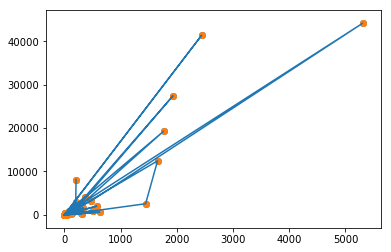

In [47]:
# 3.

from matplotlib import pyplot as plt
import requests as rq

comments = []
scores = []

for post in reddit_posts:
    scores.append(post['data']['score'])
    comments.append(post['data']['num_comments'])
    
plt.scatter(comments, scores)
plt.show()

>**Ex. 3.3.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [5]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls * 1.0 / older_girl      # 0.514 ~ 1/2
print "P(both | either): ", both_girls * 1.0 / either_girl   # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

In [6]:
allGirls = 0
twoGirls = 0
oneGirl = 0
noGirls = 0
eldestGirl = 0
aGirl = 0

random.seed(0)
for _ in range(10000):
    kids = [random_kid(), random_kid(), random_kid()]
    isGirl = [kid == "girl" for kid in kids]
    numGirls = 0
    for girl in isGirl:
        if girl:
            numGirls += 1
            
    if numGirls == 3:
        allGirls += 1
    if numGirls == 2:
        twoGirls += 1
    if numGirls == 1:
        oneGirl += 1
    if numGirls == 0:
        noGirls += 1
    if numGirls > 0:
        aGirl += 1
    if isGirl[0]:
        eldestGirl += 1
        
pAllGirls = allGirls * 1.0 / 10000
pTwoGirls = twoGirls * 1.0 / 10000
pOneGirl = oneGirl * 1.0 / 10000
pNoGirls = noGirls * 1.0 / 10000
pEldestGirl = eldestGirl * 1.0 / 10000
pAGirl = aGirl * 1.0 / 10000

print "P(threeGirls) = " + str(pAllGirls)
print "P(twoGirls) = " + str(pTwoGirls)
print "P(oneGirl) = " + str(pOneGirl)
print "P(noGirls) = " + str(pNoGirls)
print "P(allGirls | eldestGirl) = " + str(pAllGirls / pEldestGirl)
print "P(allGirls | aGirl) = " + str(pAllGirls / pAGirl)

P(threeGirls) = 0.1249
P(twoGirls) = 0.3782
P(oneGirl) = 0.3771
P(noGirls) = 0.1198
P(allGirls | eldestGirl) = 0.251055276382
P(allGirls | aGirl) = 0.14189956828


>**Ex. 4.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [6]:
#Code to find number of superheroes

import requests as rq

superHeroDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes").json()
superHeros = []

while(True):
    for hero in superHeroDict["query"]["categorymembers"]:
            superHeros.append(hero["title"])
            
    if "continue" in superHeroDict.keys():
        cont = superHeroDict["continue"]["cmcontinue"]
        superHeroDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&cmcontinue=" + cont).json()

    else:
        break
    
print len(superHeros)

965


In [7]:
#Code to determine number of supervillains

superVillainDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains").json()
superVillains = []

while(True):
    for villain in superVillainDict["query"]["categorymembers"]:
            superVillains.append(villain["title"])
            
    if "continue" in superVillainDict.keys():
        cont = superVillainDict["continue"]["cmcontinue"]
        superVillainDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmcontinue=" + cont).json()

    else:
        break

print len(superVillains)

1300


In [8]:
#Code to find Jaccard Index

#turn each list into a set
heroSet = set(superHeros)
villainSet = set(superVillains)

#find the union and intersection between hero and villain set
heroVillainUnion = heroSet.union(villainSet)
heroVillainIntersection = heroSet.intersection(villainSet)

#jaccard index
jaccard = 1.0 * len(heroVillainIntersection) / len(heroVillainUnion)
print jaccard

0.0816618911175


>**Ex. 4.1.2**: Using this list you now want to download all data you can about each character. However, because this is potentially Big Data, you cannot store it your computer's memory. Therefore, you have to store it in your harddrive somehow. 
* Create three folders on your computer, one for *heroes*, one for *villains*, and one for *ambiguous*.
* For each character, download the markdown on their pages and save in a new file in the corresponding hero/villain/ambiguous folder.

In [11]:
import io

for char in heroVillainUnion:
    url = unicode("https://en.wikipedia.org/w/api.php?format=json&action=query&titles={0}&prop=revisions&rvprop=content").format(char)
    data = rq.get(url).json()
    markup = data['query']['pages'].values()[0]['revisions'][0]['*']
    
    if char in heroVillainIntersection:
        filepath = unicode("./ambiguous/{0}.txt").format(char)
        
        try:
            charfile = io.open(filepath, 'w')
        except IOError:
            continue        
        
        try:
            charfile.write(markup)
        except UnicodeEncodeError:
            continue
            
        charfile.close()
        
    elif char in heroSet:
        filepath = unicode("./heroes/{0}.txt").format(char)
        
        try:
            charfile = io.open(filepath, 'w')
        except IOError:
            continue
        
        try:
            charfile.write(markup)
        except UnicodeEncodeError:
            continue
        
        charfile.close()
    
    else:
        filepath = unicode("./villains/{0}.txt").format(char)
        
        try:
            charfile = io.open(filepath, 'w')
        except IOError:
            continue
        
        try:
            charfile.write(markup)
        except UnicodeEncodeError:
            continue
            
        charfile.close()
        

>**Ex. 4.2.1.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

In [1]:
import re 
import os

heroes = []
villains = []
ambiguous = []

#Reads file in each directory and extracts markdown length
for filename in os.listdir("./heroes"):
    f = open("./heroes/" + filename, "r")
    markup = f.read()
    tup = filename[:-4], len(markup)
    heroes.append(tup)
    
for filename in os.listdir("./villains"):
    f = open("./villains/" + filename, "r")
    markup = f.read()
    tup = filename[:-4], len(markup)
    villains.append(tup)
    
for filename in os.listdir("./ambiguous"):
    f = open("./ambiguous/" + filename, "r")
    markup = f.read()
    tup = filename[:-4], len(markup)
    ambiguous.append(tup)


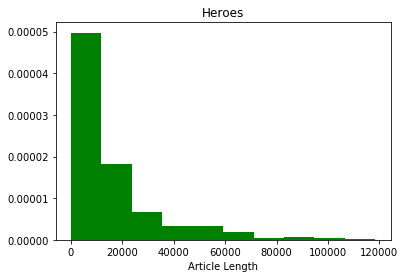

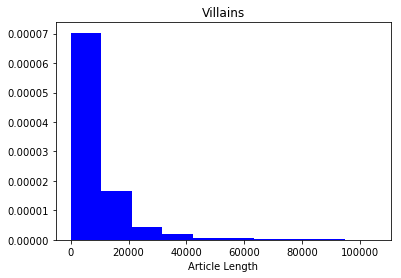

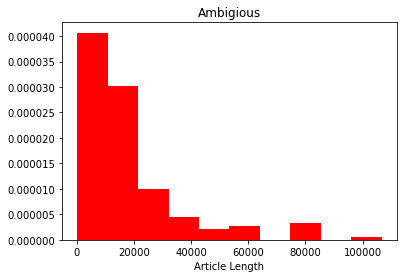

In [2]:
#Creates normalized histogram for each character class
from matplotlib import pyplot as plt

def printHist(lengths, charType ,color):
    plt.hist(lengths, facecolor= color, normed=True)
    plt.title(charType)
    plt.xlabel("Article Length")
    plt.show()
    

printHist([i[1] for i in heroes], "Heroes", "green")
printHist([i[1] for i in villains], "Villains", "blue")
printHist([i[1] for i in ambiguous], "Ambigious", "red")

The normalized histogram for each class of marvel character tells us something about the popularity of the class. While each class is right-skewed, there are differences. The ambigious class has the most even distribution of the three and a higher concentration of popular characters compared to the other two classes. This may be due to an increased popularity in characters that switch between heroes and villains. The distributions of the hero and villain class tell us that the vast majority of villains and heroes are unpopular but there are a few outliers for both classes that are extremely popular. (more popular than the most popular ambiguous character)

>**Ex. 4.2.1.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

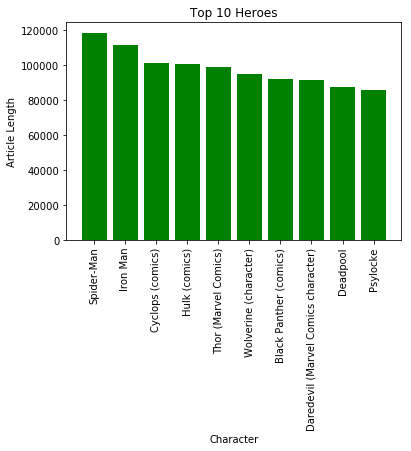

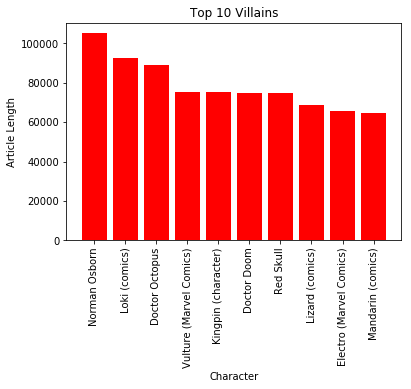

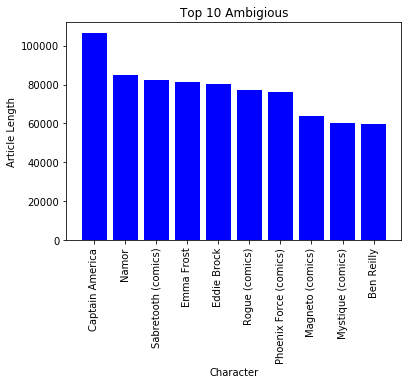

In [3]:
from matplotlib import pyplot as pltBar

#sort lists from most popular to least
heroLengthsSorted = sorted(heroes, key=lambda tup: tup[1], reverse=True)
ambLengthsSorted = sorted(ambiguous, key=lambda tup: tup[1], reverse=True)
villainLengthsSorted = sorted(villains, key=lambda tup: tup[1], reverse=True)

def printBar(names, lengths, charType, chartColor):
    xs = [i + 0.1 for i, _ in enumerate(names)]
    pltBar.bar(xs, lengths, .8,color=chartColor)
    pltBar.xticks([i + .1 for i, _ in enumerate(names)], names, rotation='vertical')
    pltBar.xlabel("Character")
    pltBar.ylabel("Article Length")
    pltBar.title("Top 10 " + charType)
    pltBar.show()
    
printBar([i[0] for i in heroLengthsSorted[:10]], [i[1] for i in heroLengthsSorted[:10]], "Heroes", "green")
printBar([i[0] for i in villainLengthsSorted[:10]], [i[1] for i in villainLengthsSorted[:10]], "Villains", "red")
printBar([i[0] for i in ambLengthsSorted[:10]], [i[1] for i in ambLengthsSorted[:10]], "Ambigious", "blue")

The bar charts of the top 10 most popular characters for each class confirm our findings from the previous problem. The ambiguous class displays a lack or extremely popular characters but has a larger amount of characters with a markup length of 80,000 than the top 10 villains chart. The villains chart shows that there are 3 villains that are extremely popular while the rest of the top 10 are signifigantly less popular. The top 10 heros chart shows that all ten have a markup length of over 80,000. This reaffirms the findings from the previous problem, showing that marvel heroes have the signifigant portion of the most popular characters. 

>**Ex. 4.2.2.1**: We are interested to know if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* Visualize the amount of heroes introduces over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`.*

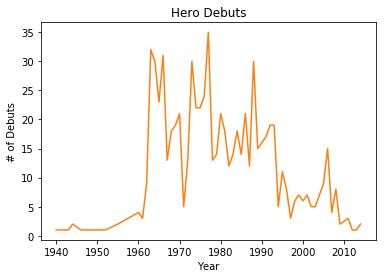

In [34]:
import re
import os
from collections import Counter
from matplotlib import pyplot as plt


heroes = []
villains = []
ambiguous = []
ambDebuts = []
heroDebuts = []
villainDebuts = []

directories = ['./heroes/', './villains/', './ambiguous/']
debutLists = [ambDebuts, heroDebuts, villainDebuts]

# Populate category lists
for char in (heroVillainUnion):
    if char in heroVillainIntersection:
        ambiguous.append(char)
    elif char in superHeros:
        heroes.append(char)
    elif char in superVillains:
        villains.append(char)

# Populate lists of debut dates
for i in range(3):
    for filename in os.listdir(directories[i]):
        f = open(directories[i] + filename, "r")
        markup = f.read()
    
        # Ignore anything without a debut date
        try:
            debutLists[i].append(int(re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup)[0])[0][:-1]))
        except IndexError:
            pass

# Count debut date frequency
ambDebutCounts = Counter(ambDebuts)
heroDebutCounts = Counter(heroDebuts)
villainDebutCounts = Counter(villainDebuts)


# Plot it
plt.plot(heroDebutCounts.keys(), heroDebutCounts.values())
plt.title("Hero Debuts")
plt.xlabel("Year")
plt.ylabel("# of Debuts")
plt.show()

Not all of the pages had a debut year, and the regular expression also seemed to pick up a disproportionately low number of villain debut dates considering that there are more villains than there are heroes or ambiguous characters. This is handled using a try/except block that catches all the IndexErrors that are thrown when the regular expression returns a null value.

I chose to visualize this as a line graph in order to best show the fluctuation of hero debuts over time. From the plot, we can see that superheroes were introduced most frequently between 1960 and 1990 after skyrocketing in the early 60s. However, these numbers dropped in the latter half of the 90s, indicating a disinterest in the superhero genre. However, there is a resurgence in the late 2000s, possibly due to the release of various superhero films that re-sparked public interest in superheroes.

>**Ex. 4.2.3.1**: In this exercise we want to extract the team affiliations for each character. Each character may be associated with multiple teams. In the info table of the markup, the teams are listed in the *alliances*-field.
* Write a regex extracts the *alliances*-field.
* Write a regex that extracts each team from the *alliance*-field.
* Count the number of members for each team (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* Print the 10 largest alliances and their number of members.

In [31]:
import re
import os
from collections import defaultdict

dd = defaultdict(int)

directories = ['./heroes/', './villains/', './ambiguous/']

for directory in directories:
    for filename in os.listdir(directory):
        f = open(directory + filename, "r")
        markup = f.read() 

        try:
            alliances_text = re.findall(r"alliances = .*.", markup)[0]
        except:
            continue

        alliances = re.findall("\[\[(.*?)\]\]", alliances_text) 
        print alliances
        print len(alliances)  

        for team in alliances:
            dd[team] += 1
        
print dd


['Desert Sword', 'Pantheon (Marvel Comics)|Pantheon']
2
['List of X-Men members#Other student squads (2003\xe2\x80\x932006)|Paladins training squad', 'X-Mansion|Xavier Institute', 'New X-Men', 'List of X-Men members#X-Men-In-Training (2006\xe2\x80\x93present)|X-Men-In-Training', 'X-Men', 'List of Xavier Institute students and staff#Students|Jean Grey School Students']
6
[]
0
[]
0
[]
0
['Genetix (comics)|Genetix']
1
[]
0
['Fantastic Four', 'Avengers (comics)|Avengers', 'Defenders (comics)|Defenders', 'Fantastic Force', 'Illuminati (comics)|Illuminati', 'Ultimates (2015 team)|Ultimates']
6
[]
0
['X-Mansion|Xavier Institute', 'List of X-Men members#X-Men-In-Training (2006\xe2\x80\x93present)|X-Men-In-Training', 'Young X-Men', 'List of Xavier Institute students and staff#Students|Jean Grey School Students']
4
['New Mutants', 'X-Men']
2
[]
0
['Church of Hala', 'Skrull|Skrull Empire']
2
['A-Force', 'Alpha Flight|Alpha Flight Space Program', 'Avengers (comics)|Avengers', 'Defenders (comics)|"

['Nightstalkers (comics)|Nightstalkers', 'Midnight Sons']
2
['Sinister Six']
1
[]
0
['Alpha Squadron (comics)|Alpha Squadron training squad', 'X-Mansion|Xavier Institute']
2
['Supreme Intelligence|Plex', 'Kree', 'Dark Avengers', 'Avengers (comics)|Avengers', 'Young Avengers']
5
[]
0
['X-Men', 'Brotherhood of Mutants|Brotherhood of Evil Mutants', 'Uncanny Avengers|Avengers Unity Division', 'X-Treme X-Men', 'X.S.E']
5
['X-Men', 'Brotherhood of Mutants|Brotherhood of Evil Mutants', 'Team X (comics)|Team X', 'Marauders (comics)|Marauders', 'X-Factor (comics)|X-Factor', 'Weapon X', 'List of Avengers members#Fury\'s Black Ops Initiative (1959)|"Avengers" (1959)', 'Hand (comics)|Hand', 'List of Avengers members#Astonishing Avengers (2014)|Astonishing Avengers', 'Uncanny Avengers|Avengers Unity Division']
10
['Hydra (Marvel Comics)|HYDRA', 'Big Hero 6 (comics)|Big Hero 6', 'Legion Accursed']
3
[]
0
['Inhumans|Inhuman Royal Family', 'Deep Six (Marvel Comics)|Deep Six']
2
['Avengers (comics)|Ave

In [58]:
#print sorted(dd.values(), reverse=True)
top_ten_nums = []
top_ten = []

for num in sorted(dd.values(), reverse=True)[:10]:
    top_ten_nums.append(num)
    
for key in dd.keys():
    if dd[key] in top_ten_nums:
        top_ten.append(tuple((dd[key], key)))
        
print sorted(top_ten, reverse=True)
        



[(6, 'Fantastic Four'), (6, 'Heroes for Hire'), (6, 'New Mutants'), (6, 'The New Avengers (comics)|New Avengers'), (7, 'Squadron Supreme'), (8, 'Defenders (comics)|Defenders'), (8, 'New Warriors'), (9, 'Thunderbolts (comics)|Thunderbolts'), (12, 'S.H.I.E.L.D.'), (13, 'X-Men'), (21, 'Avengers (comics)|Avengers')]
